In [1]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import umap
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, average_precision_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine

In [2]:
#define the functions that will be used for testing
def minikmeans_test(clusters, batch):
    cluster = MiniBatchKMeans(random_state=357,
        init='random', n_clusters=clusters, batch_size=batch)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def kmeans_test(n):
    cluster = KMeans(n_clusters=n, random_state=357)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def dbscan(epsilon, samples):
    cluster = DBSCAN(eps = epsilon, min_samples = samples)
    y_pred = cluster.fit_predict(X)
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))

def gmm_test(n):
    cluster = GaussianMixture(n_components=n, random_state=357)
    y_pred = cluster.fit_predict(X)
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def agg_test(link, aff, n):
    cluster = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=2)
    y_pred = cluster.fit_predict(X)
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def tsne_test(n, p):
    tsne = TSNE(n_components=n, verbose=1, perplexity=p, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
def UMAP(n, d):
    umap_results = umap.UMAP(n_neighbors=n, min_dist=d,
                      metric='correlation').fit_transform(X)
    print('Parameters: {}, {}'.format(n, d))
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [3]:
#get the data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
houses_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, houses_db))

df = pd.read_sql_query('SELECT * FROM houseprices', con=engine)

engine.dispose()

In [4]:
#check the data
display(df.head())
display(df.info())

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

None

In [5]:
#data cleaning, removing all columns that might cause issues, and filling the nulls
df = df.select_dtypes(exclude=object)
df = df.drop(['garageyrblt', 'id', 'mssubclass', 'mosold'], 1)
df = df.fillna(0)
##garageyrblt was removed because there was no good way to fill the nulls
##id was essentially useless for classification
##mssubclass and mosold are categorical values

In [6]:
#make a copy of the data since we'll be performing various transformations to it
copy = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lotfrontage    1460 non-null   float64
 1   lotarea        1460 non-null   int64  
 2   overallqual    1460 non-null   int64  
 3   overallcond    1460 non-null   int64  
 4   yearbuilt      1460 non-null   int64  
 5   yearremodadd   1460 non-null   int64  
 6   masvnrarea     1460 non-null   float64
 7   bsmtfinsf1     1460 non-null   int64  
 8   bsmtfinsf2     1460 non-null   int64  
 9   bsmtunfsf      1460 non-null   int64  
 10  totalbsmtsf    1460 non-null   int64  
 11  firstflrsf     1460 non-null   int64  
 12  secondflrsf    1460 non-null   int64  
 13  lowqualfinsf   1460 non-null   int64  
 14  grlivarea      1460 non-null   int64  
 15  bsmtfullbath   1460 non-null   int64  
 16  bsmthalfbath   1460 non-null   int64  
 17  fullbath       1460 non-null   int64  
 18  halfbath

In [8]:
#seperate the target variable from the rest
y = df['saleprice']
X = df.drop(['saleprice'], 1)

In [9]:
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
#try a mini-batch kmeans to ensure data works
minikmeans_test(2, 50)

Silhouette score: 0.14
ARI score: 0.00


In [11]:
#determine the number of components necessary to explain most of the variance for PCA
for n in range(2, 32):
    pca = PCA(n_components=n).fit(X)
    print('Variance explained by {} components: {:0.2f}'.format(n, (pca.explained_variance_ratio_).sum()))

Variance explained by 2 components: 0.30
Variance explained by 3 components: 0.36
Variance explained by 4 components: 0.42
Variance explained by 5 components: 0.46
Variance explained by 6 components: 0.50
Variance explained by 7 components: 0.53
Variance explained by 8 components: 0.56
Variance explained by 9 components: 0.60
Variance explained by 10 components: 0.63
Variance explained by 11 components: 0.66
Variance explained by 12 components: 0.69
Variance explained by 13 components: 0.72
Variance explained by 14 components: 0.75
Variance explained by 15 components: 0.77
Variance explained by 16 components: 0.80
Variance explained by 17 components: 0.82
Variance explained by 18 components: 0.85
Variance explained by 19 components: 0.87
Variance explained by 20 components: 0.89
Variance explained by 21 components: 0.91
Variance explained by 22 components: 0.93
Variance explained by 23 components: 0.94
Variance explained by 24 components: 0.96
Variance explained by 25 components: 0.97


In [12]:
#21 components explains 90% of the variance, so we'll reduce the components to that point
pca = PCA(n_components=21)
X = pca.fit_transform(X)

In [13]:
#run another MBKmeans to ensure the data works and that the PCA had an effect
minikmeans_test(2, 50)

Silhouette score: 0.15
ARI score: 0.00


In [14]:
#run the battery of tests, tuning the parameters for each
##because the dataset is smaller, we can be greedy and run each
##test multiple times
###start with kmeans
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    kmeans_test(i)


Number of components: 2
Silhouette score: 0.16
ARI score: 0.00

Number of components: 3
Silhouette score: 0.16
ARI score: 0.00

Number of components: 4
Silhouette score: 0.17
ARI score: 0.00

Number of components: 5
Silhouette score: 0.12
ARI score: 0.00

Number of components: 6
Silhouette score: 0.11
ARI score: 0.00

Number of components: 7
Silhouette score: 0.12
ARI score: 0.00

Number of components: 8
Silhouette score: 0.12
ARI score: 0.00

Number of components: 9
Silhouette score: 0.13
ARI score: 0.00

Number of components: 10
Silhouette score: 0.14
ARI score: 0.00

Number of components: 11
Silhouette score: 0.13
ARI score: 0.00

Number of components: 12
Silhouette score: 0.13
ARI score: 0.01

Number of components: 13
Silhouette score: 0.15
ARI score: 0.00

Number of components: 14
Silhouette score: 0.14
ARI score: 0.00

Number of components: 15
Silhouette score: 0.14
ARI score: 0.00

Number of components: 16
Silhouette score: 0.14
ARI score: 0.00

Number of components: 17
Silhoue

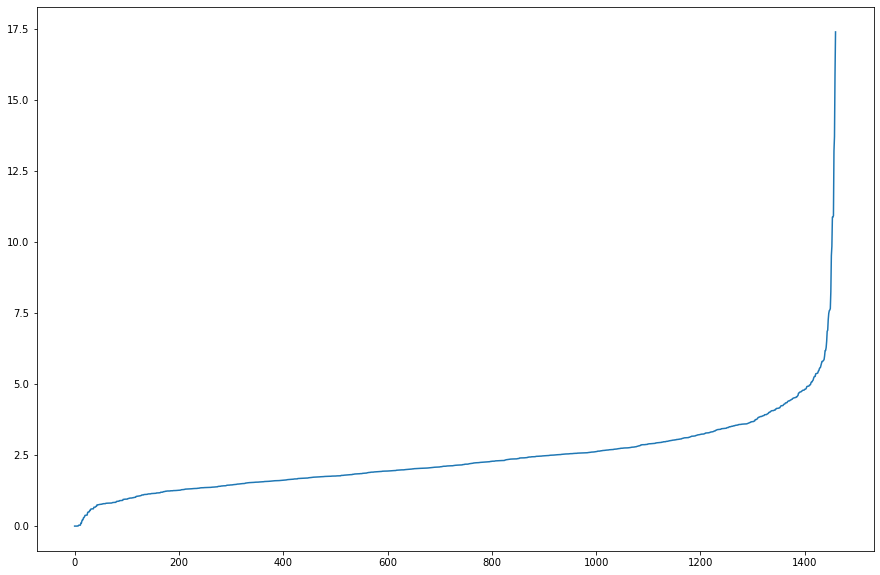

In [15]:
#for dbscan, we'll try to find the most efficient eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.plot(distances);

In [16]:
#based on the graph, epsilon will be around 4
dbscan(4, 25)

Silhouette score: 0.23
ARI score: 0.00


In [17]:
#try gmm with varying number of clusters
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    gmm_test(i)


Number of components: 2
Silhouette score: 0.72
ARI score: -0.00

Number of components: 3
Silhouette score: 0.08
ARI score: -0.00

Number of components: 4
Silhouette score: 0.16
ARI score: -0.00

Number of components: 5
Silhouette score: 0.08
ARI score: -0.00

Number of components: 6
Silhouette score: 0.06
ARI score: -0.00

Number of components: 7
Silhouette score: 0.06
ARI score: -0.00

Number of components: 8
Silhouette score: 0.05
ARI score: 0.00

Number of components: 9
Silhouette score: 0.06
ARI score: 0.00

Number of components: 10
Silhouette score: 0.05
ARI score: 0.00

Number of components: 11
Silhouette score: 0.06
ARI score: 0.00

Number of components: 12
Silhouette score: 0.06
ARI score: 0.00

Number of components: 13
Silhouette score: 0.07
ARI score: 0.00

Number of components: 14
Silhouette score: 0.08
ARI score: 0.00

Number of components: 15
Silhouette score: 0.07
ARI score: 0.00

Number of components: 16
Silhouette score: 0.06
ARI score: 0.00

Number of components: 17
S

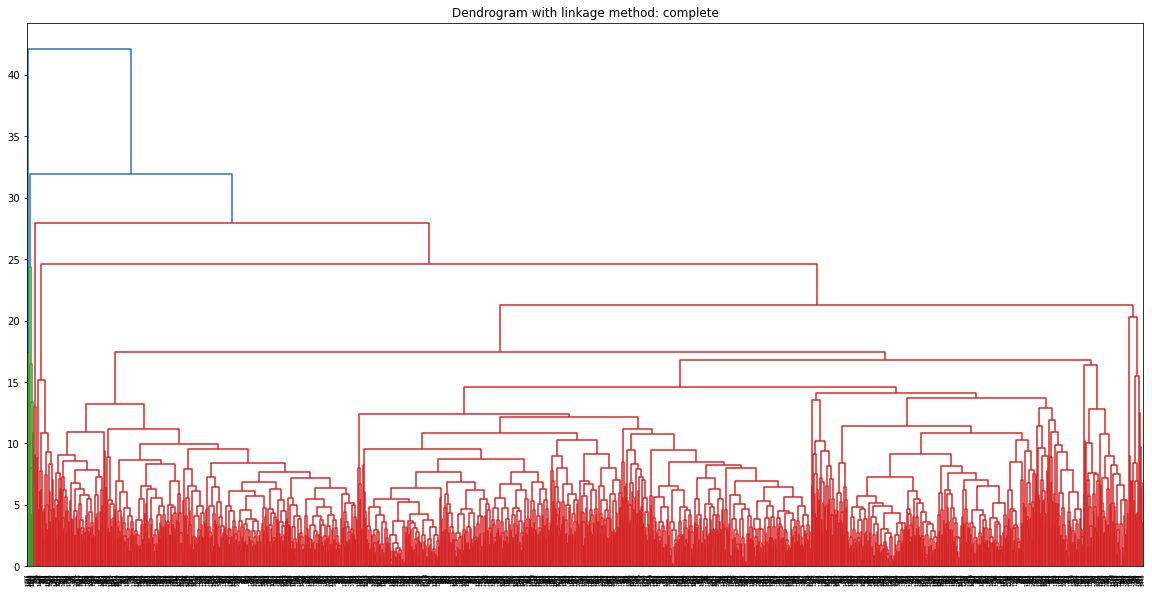

In [18]:
#creating dendrograms to determine if any of the agglomerative are worth considering
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X, method='average'))
plt.show()

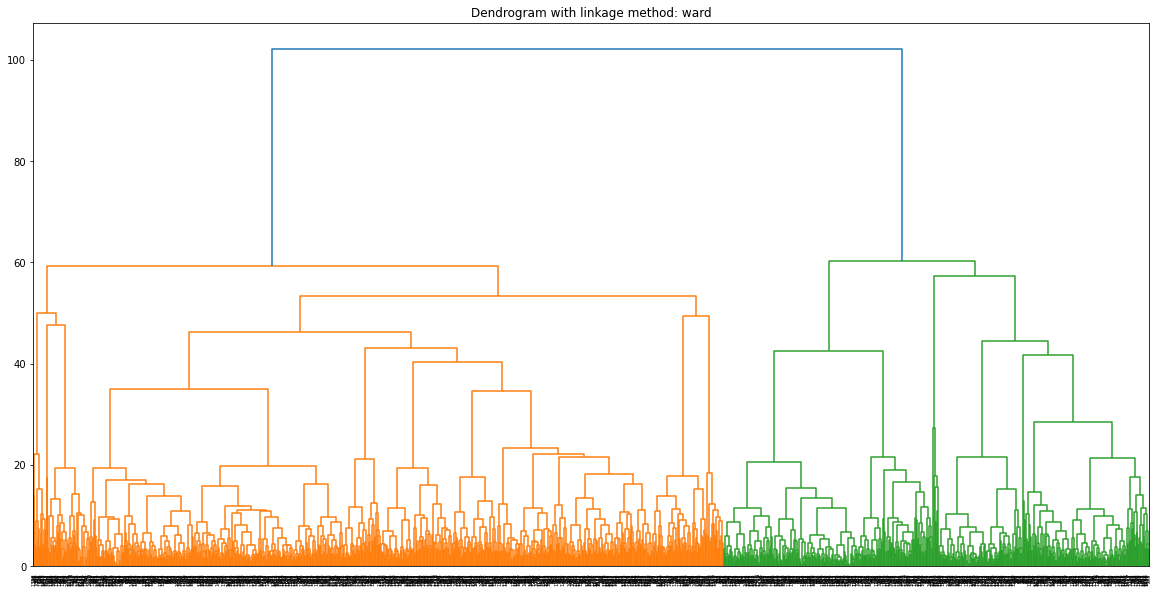

In [19]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X, method='ward'))
plt.show()

In [20]:
#ward works best with 2 clusters explaining the most
agg_test('ward', 'euclidean', 2)

Silhouette score: 0.72
ARI score: -0.00


GMM and Agglomerative with N_clusters = 2 has been around 70% effective according to silhouette after using PCA. We'll now run the same tests with tSNE and UMAP.

In [21]:
#reset the data
y = df['saleprice']
X = df.drop(['saleprice'], 1)
X = scaler.fit_transform(X)


Perplexity set to 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.009s...
[t-SNE] Computed neighbors for 1460 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.077362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.077148
[t-SNE] KL divergence after 300 iterations: 1.851572


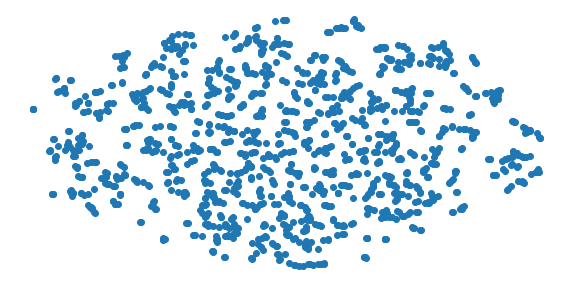


Perplexity set to 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.324872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.779266
[t-SNE] KL divergence after 300 iterations: 1.624791


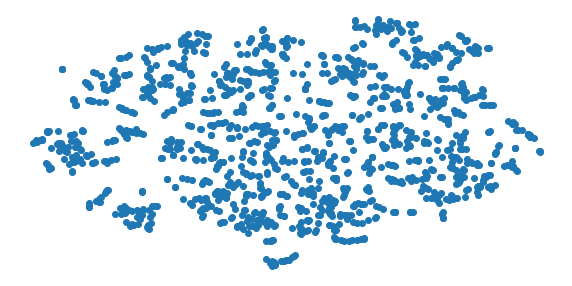


Perplexity set to 15
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.456855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.707970
[t-SNE] KL divergence after 300 iterations: 1.511096


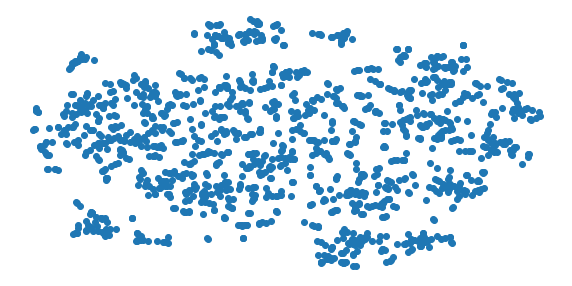


Perplexity set to 20
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.009s...
[t-SNE] Computed neighbors for 1460 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.548990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.791656
[t-SNE] KL divergence after 300 iterations: 1.442839


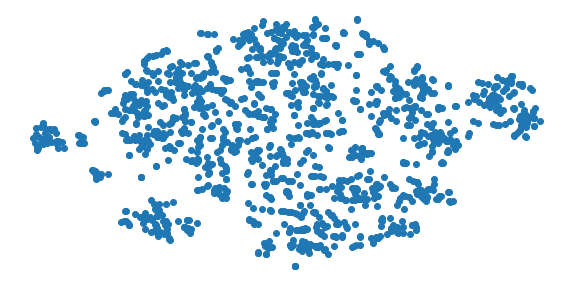


Perplexity set to 25
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.620817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.392754
[t-SNE] KL divergence after 300 iterations: 1.380890


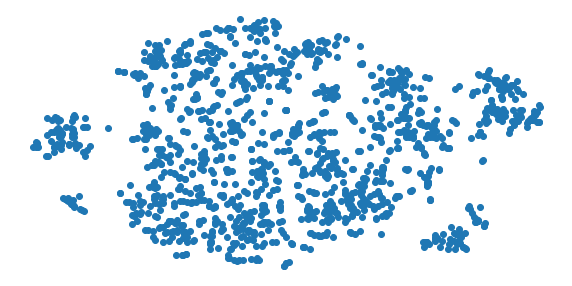


Perplexity set to 30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.011s...
[t-SNE] Computed neighbors for 1460 samples in 0.119s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.680086
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.626930
[t-SNE] KL divergence after 300 iterations: 1.356899


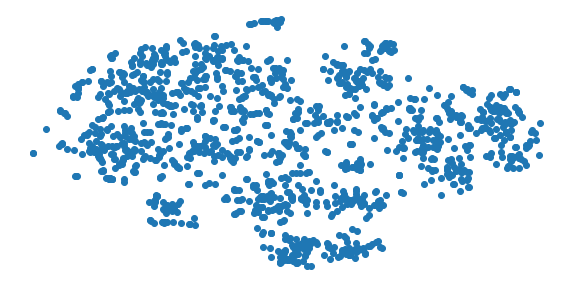


Perplexity set to 35
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.011s...
[t-SNE] Computed neighbors for 1460 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.730879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.574257
[t-SNE] KL divergence after 300 iterations: 1.334036


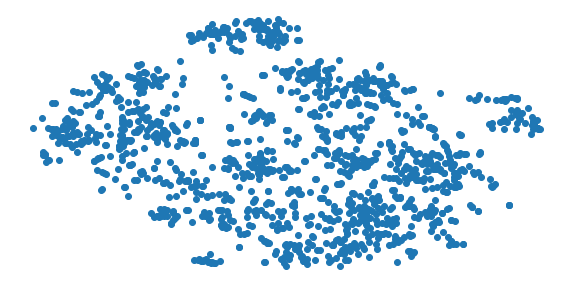


Perplexity set to 40
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.775515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.363937
[t-SNE] KL divergence after 300 iterations: 1.313916


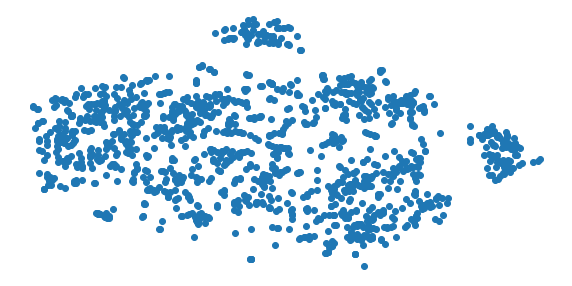


Perplexity set to 45
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.011s...
[t-SNE] Computed neighbors for 1460 samples in 0.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.815448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.279121
[t-SNE] KL divergence after 300 iterations: 1.295883


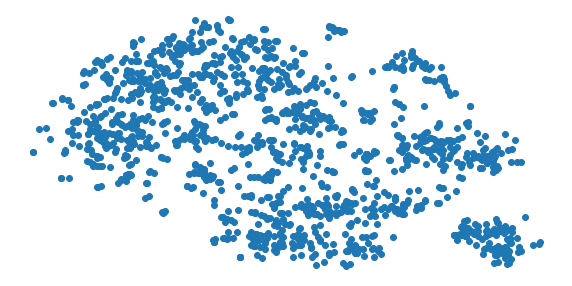


Perplexity set to 50
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.851693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.949768
[t-SNE] KL divergence after 300 iterations: 1.289218


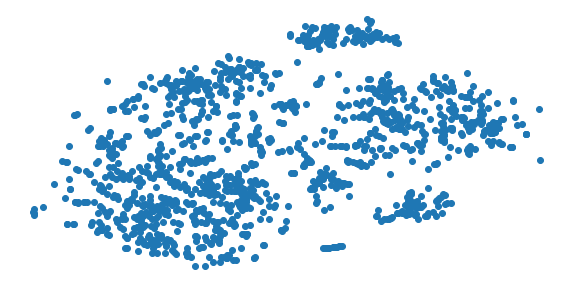

In [22]:
for i in range(1,11):
    print('\nPerplexity set to {}'.format(i*5))
    tsne_test(2, i*5)


Perplexity set to 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.008s...
[t-SNE] Computed neighbors for 1460 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.077362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.579651
[t-SNE] KL divergence after 300 iterations: 1.531118


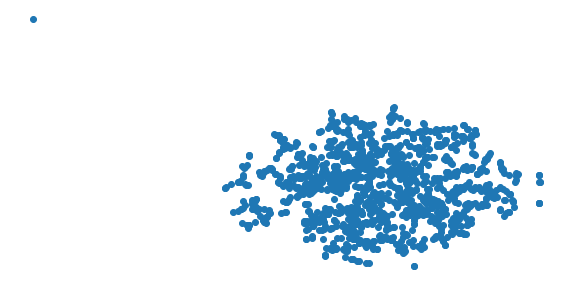


Perplexity set to 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.324872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.301750
[t-SNE] KL divergence after 300 iterations: 1.422268


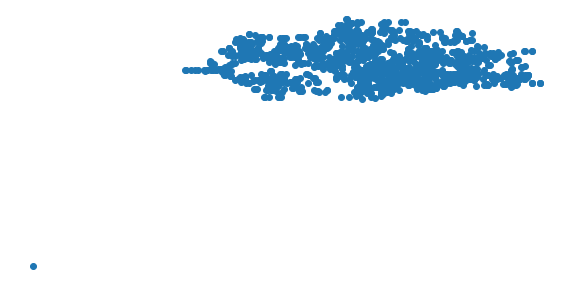


Perplexity set to 15
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.456855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.414726
[t-SNE] KL divergence after 300 iterations: 1.375264


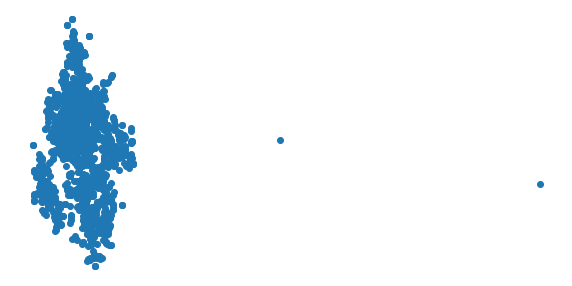


Perplexity set to 20
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.548990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.203232
[t-SNE] KL divergence after 300 iterations: 1.276907


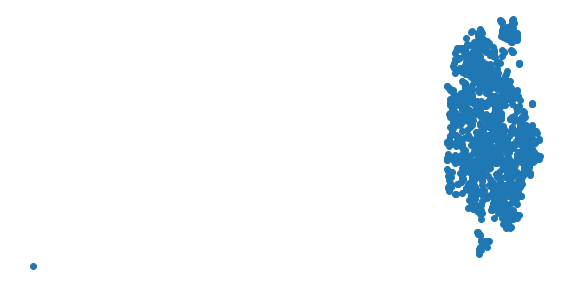


Perplexity set to 25
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.620817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.891388
[t-SNE] KL divergence after 300 iterations: 1.285532


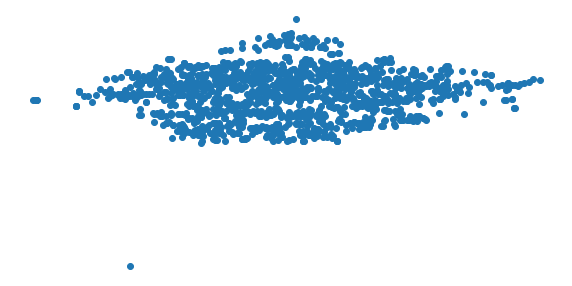


Perplexity set to 30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.680086
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.751968
[t-SNE] KL divergence after 300 iterations: 1.169061


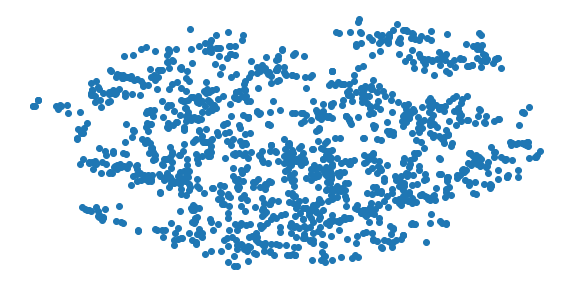


Perplexity set to 35
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.730879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.882393
[t-SNE] KL divergence after 300 iterations: 1.188021


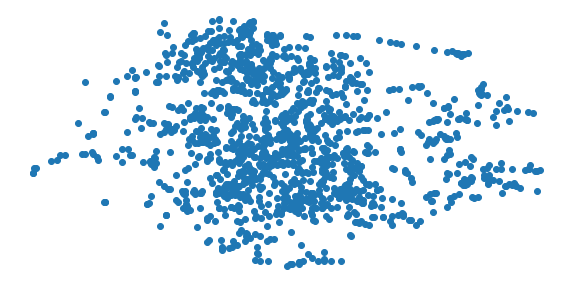


Perplexity set to 40
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.775515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.992737
[t-SNE] KL divergence after 300 iterations: 1.150260


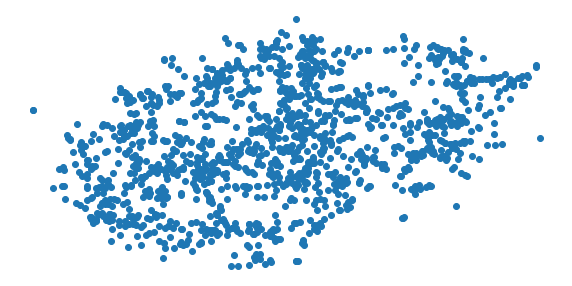


Perplexity set to 45
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.815448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.191833
[t-SNE] KL divergence after 300 iterations: 1.136188


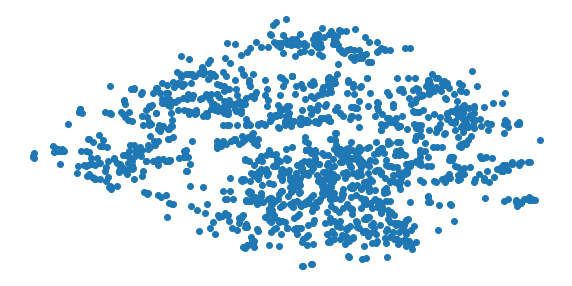


Perplexity set to 50
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.010s...
[t-SNE] Computed neighbors for 1460 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.851693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.817787
[t-SNE] KL divergence after 300 iterations: 1.158015


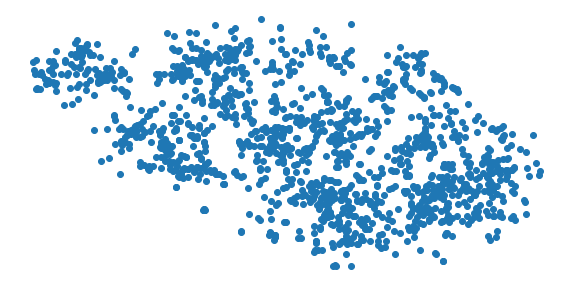

In [23]:
for i in range(1,11):
    print('\nPerplexity set to {}'.format(i*5))
    tsne_test(3, i*5)

None of the tSNE's look good but 2 components at 40 perplexity looks best.

In [24]:
#transform the data with tSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1460 samples in 0.007s...
[t-SNE] Computed neighbors for 1460 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1460
[t-SNE] Computed conditional probabilities for sample 1460 / 1460
[t-SNE] Mean sigma: 1.775515
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.255745
[t-SNE] KL divergence after 300 iterations: 1.333297


In [25]:
#rerun the battery of tests
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    kmeans_test(i)


Number of components: 2
Silhouette score: 0.44
ARI score: 0.00

Number of components: 3
Silhouette score: 0.41
ARI score: 0.00

Number of components: 4
Silhouette score: 0.42
ARI score: 0.00

Number of components: 5
Silhouette score: 0.43
ARI score: 0.00

Number of components: 6
Silhouette score: 0.44
ARI score: 0.00

Number of components: 7
Silhouette score: 0.46
ARI score: 0.00

Number of components: 8
Silhouette score: 0.45
ARI score: 0.00

Number of components: 9
Silhouette score: 0.45
ARI score: 0.00

Number of components: 10
Silhouette score: 0.43
ARI score: 0.00

Number of components: 11
Silhouette score: 0.43
ARI score: 0.00

Number of components: 12
Silhouette score: 0.43
ARI score: 0.00

Number of components: 13
Silhouette score: 0.43
ARI score: 0.00

Number of components: 14
Silhouette score: 0.43
ARI score: 0.01

Number of components: 15
Silhouette score: 0.44
ARI score: 0.00

Number of components: 16
Silhouette score: 0.45
ARI score: 0.00

Number of components: 17
Silhoue

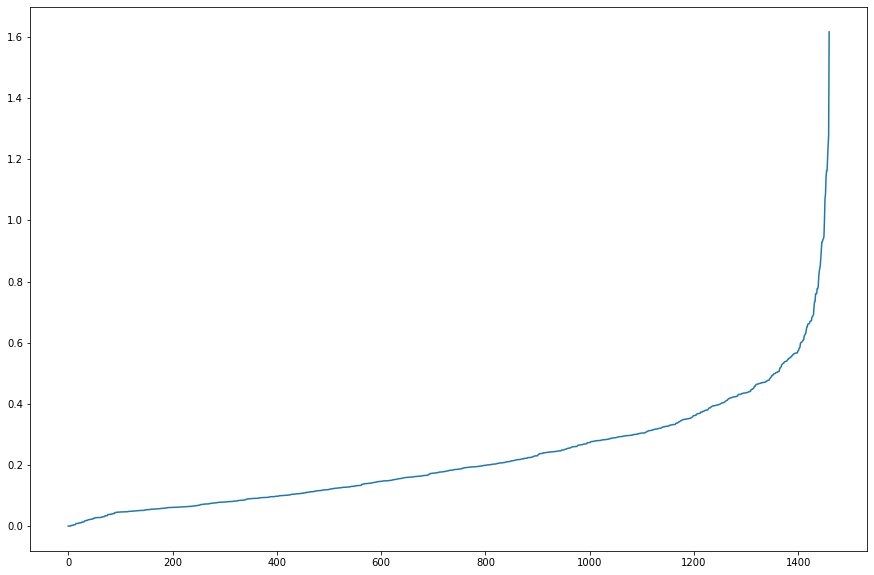

In [26]:
#determine epsilon
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.plot(distances);

In [27]:
#based on the graph, epsilon will be around 0.4
##the highest min_samples I can use with 0.4 is 12
dbscan(0.4, 12)

Silhouette score: -0.48
ARI score: 0.00


In [28]:
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    gmm_test(i)


Number of components: 2
Silhouette score: 0.44
ARI score: 0.00

Number of components: 3
Silhouette score: 0.40
ARI score: 0.00

Number of components: 4
Silhouette score: 0.41
ARI score: 0.00

Number of components: 5
Silhouette score: 0.40
ARI score: 0.00

Number of components: 6
Silhouette score: 0.41
ARI score: 0.00

Number of components: 7
Silhouette score: 0.46
ARI score: 0.00

Number of components: 8
Silhouette score: 0.44
ARI score: 0.00

Number of components: 9
Silhouette score: 0.45
ARI score: 0.00

Number of components: 10
Silhouette score: 0.43
ARI score: 0.00

Number of components: 11
Silhouette score: 0.42
ARI score: 0.00

Number of components: 12
Silhouette score: 0.42
ARI score: 0.00

Number of components: 13
Silhouette score: 0.42
ARI score: 0.00

Number of components: 14
Silhouette score: 0.43
ARI score: 0.00

Number of components: 15
Silhouette score: 0.43
ARI score: 0.00

Number of components: 16
Silhouette score: 0.44
ARI score: 0.00

Number of components: 17
Silhoue

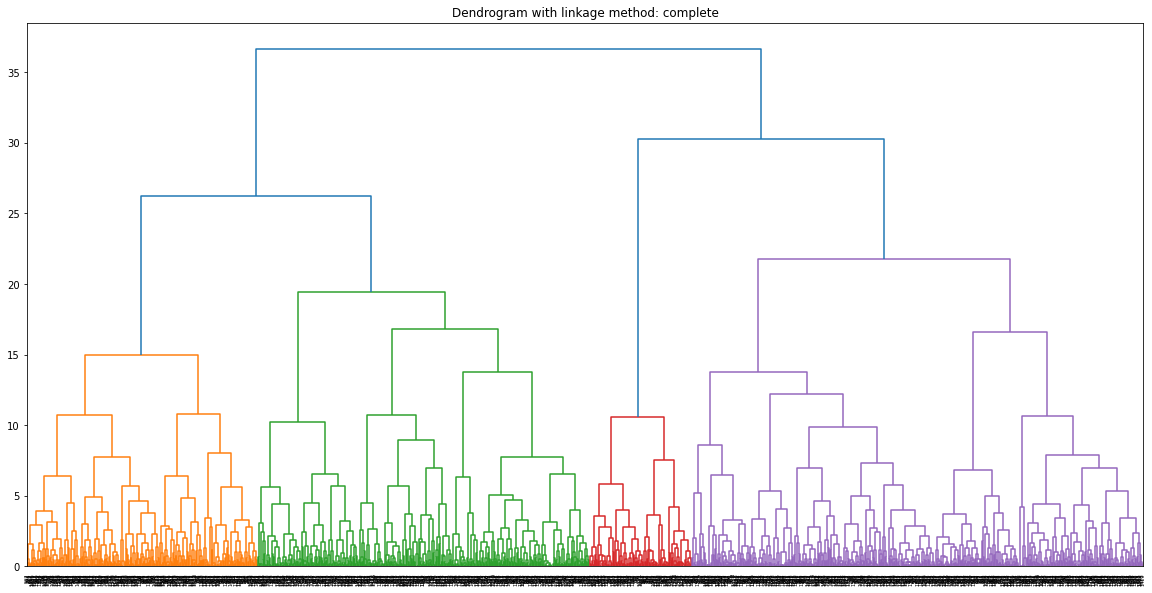

In [29]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X, method='complete'))
plt.show()

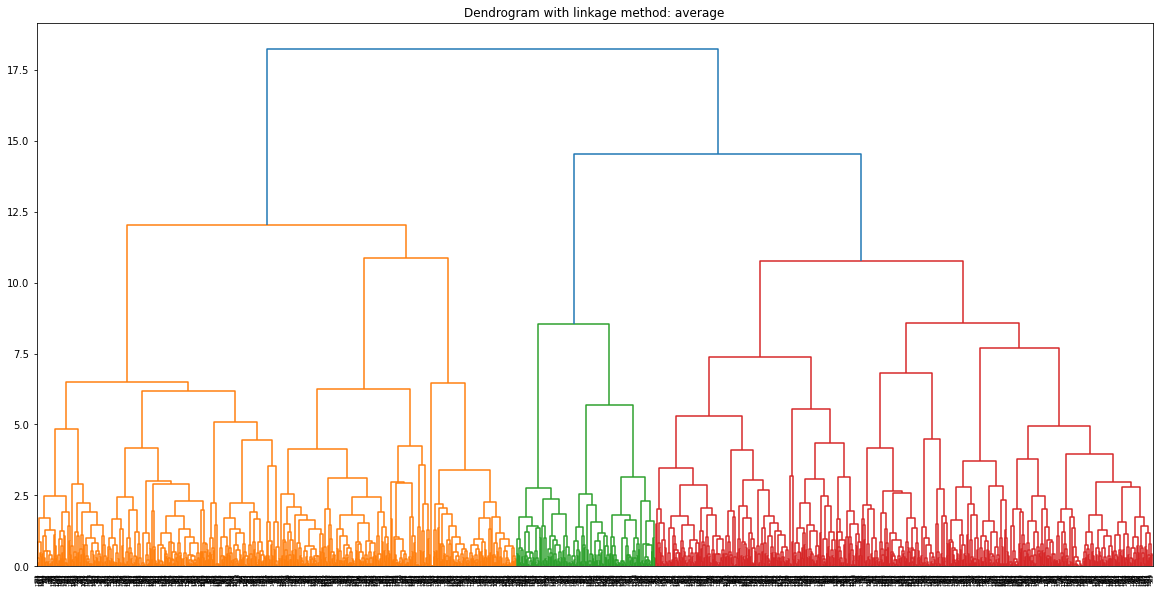

In [30]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X, method='average'))
plt.show()

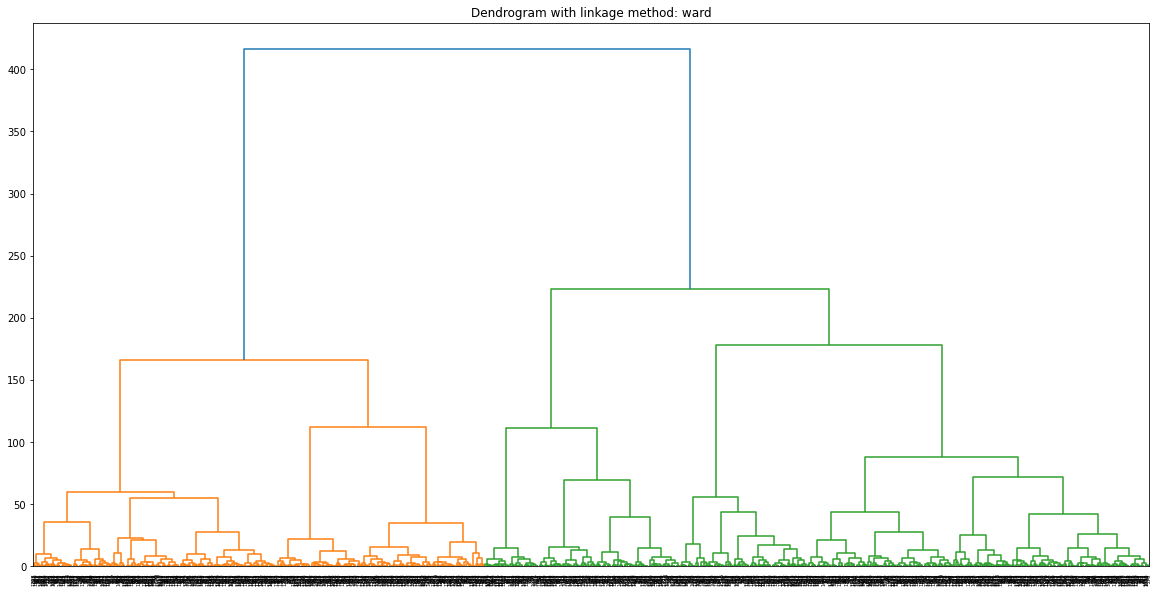

In [31]:
#creating dendrograms to determine if any of the agglomerative are worth considering
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X, method='ward'))
plt.show()

Ward with n_clusters=4 seems to be the best.

In [32]:
#ward works best with 2 clusters explaining the most
agg_test('ward', 'euclidean', 4)

Silhouette score: 0.41
ARI score: 0.00


tSNE as dimensionality reduction had no results over 70%. Time to try UMAP.

In [33]:
#reset the data
y = df['saleprice']
X = df.drop(['saleprice'], 1)
X = scaler.fit_transform(X)

Parameters: 10, 0.4


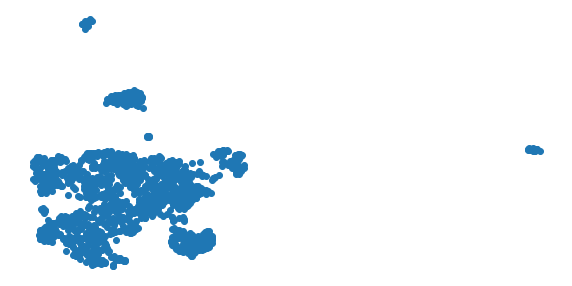

Parameters: 15, 0.4


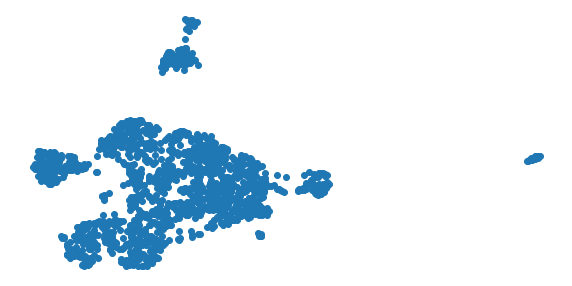

Parameters: 20, 0.4


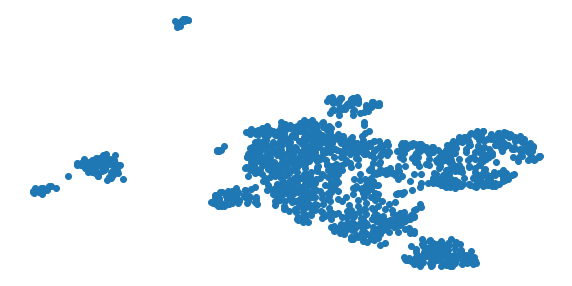

Parameters: 25, 0.4


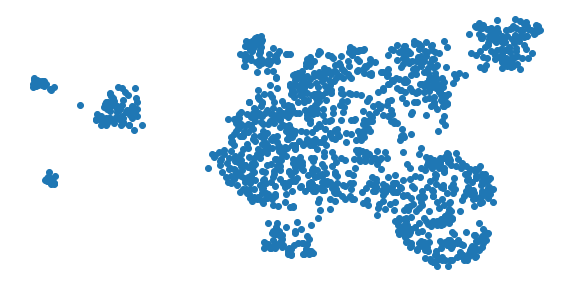

Parameters: 30, 0.4


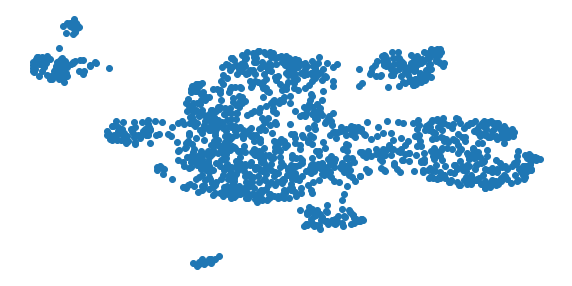

Parameters: 35, 0.4


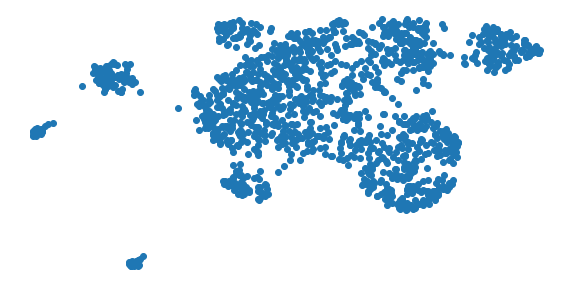

Parameters: 40, 0.4


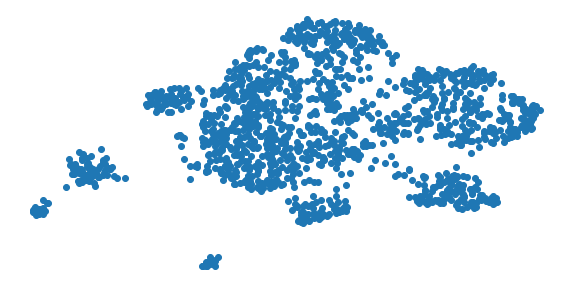

Parameters: 45, 0.4


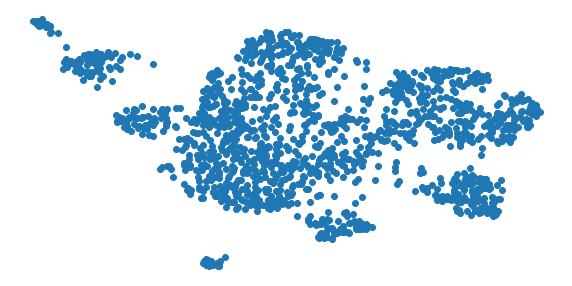

Parameters: 50, 0.4


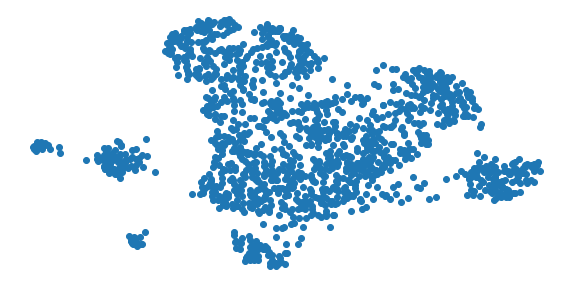

In [34]:
for i in range (2, 11):
    UMAP(i*5, 0.4)

Parameters: 35, 0.2


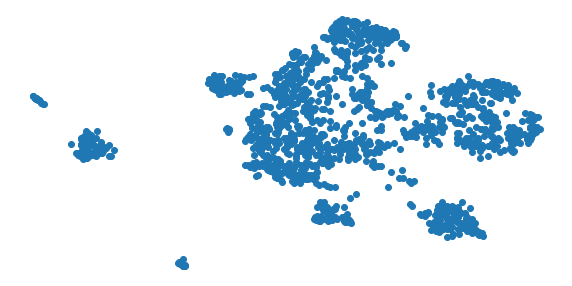

Parameters: 35, 0.30000000000000004


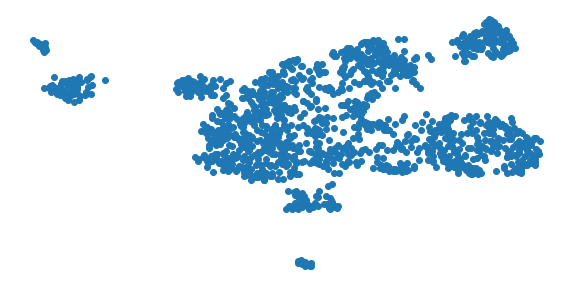

Parameters: 35, 0.4


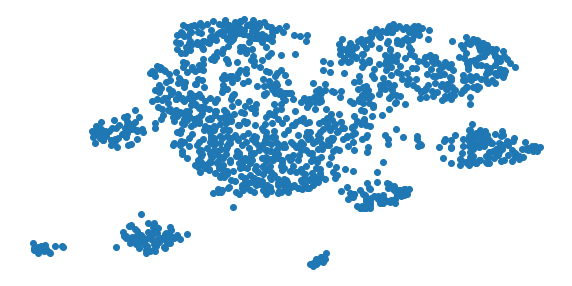

Parameters: 35, 0.5


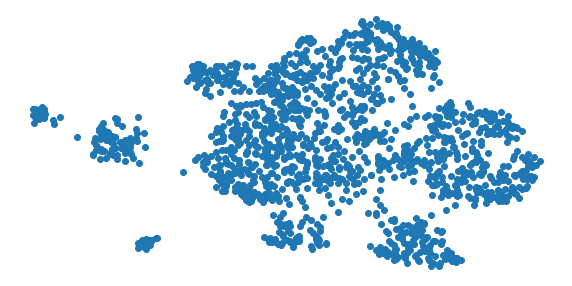

Parameters: 35, 0.6000000000000001


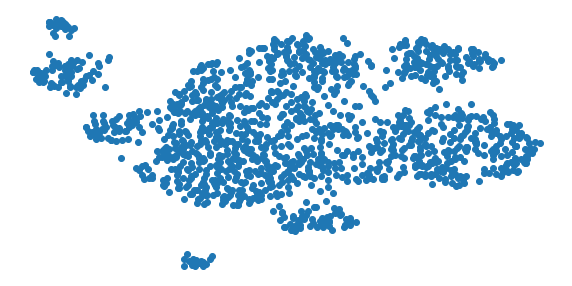

Parameters: 35, 0.7000000000000001


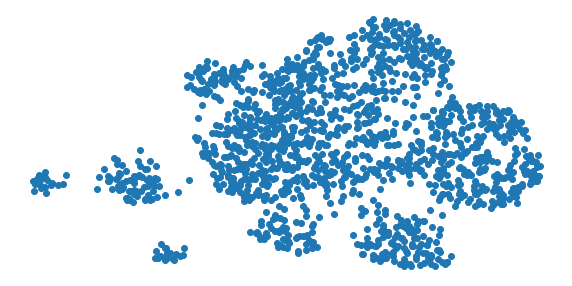

Parameters: 35, 0.8


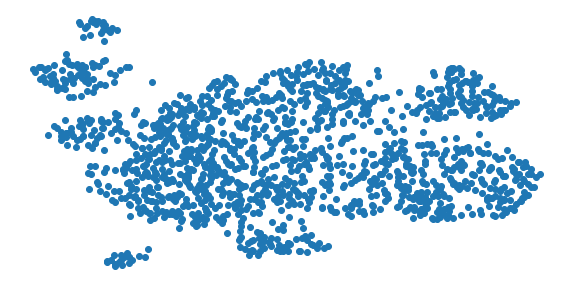

In [35]:
for i in range (2, 9):
    UMAP(35, i*0.1)

n=35 and p=0.2 seemed to have a decent amount of seperation, so we'll use those

In [36]:
X = umap.UMAP(n_neighbors=35, min_dist=0.2,
                      metric='correlation').fit_transform(X)

In [37]:
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    kmeans_test(i)


Number of components: 2
Silhouette score: 0.38
ARI score: 0.00

Number of components: 3
Silhouette score: 0.39
ARI score: 0.00

Number of components: 4
Silhouette score: 0.46
ARI score: 0.00

Number of components: 5
Silhouette score: 0.48
ARI score: 0.00

Number of components: 6
Silhouette score: 0.46
ARI score: 0.00

Number of components: 7
Silhouette score: 0.49
ARI score: 0.00

Number of components: 8
Silhouette score: 0.52
ARI score: 0.00

Number of components: 9
Silhouette score: 0.51
ARI score: 0.00

Number of components: 10
Silhouette score: 0.51
ARI score: 0.00

Number of components: 11
Silhouette score: 0.52
ARI score: 0.00

Number of components: 12
Silhouette score: 0.52
ARI score: 0.00

Number of components: 13
Silhouette score: 0.51
ARI score: 0.00

Number of components: 14
Silhouette score: 0.53
ARI score: 0.00

Number of components: 15
Silhouette score: 0.54
ARI score: 0.00

Number of components: 16
Silhouette score: 0.53
ARI score: 0.00

Number of components: 17
Silhoue

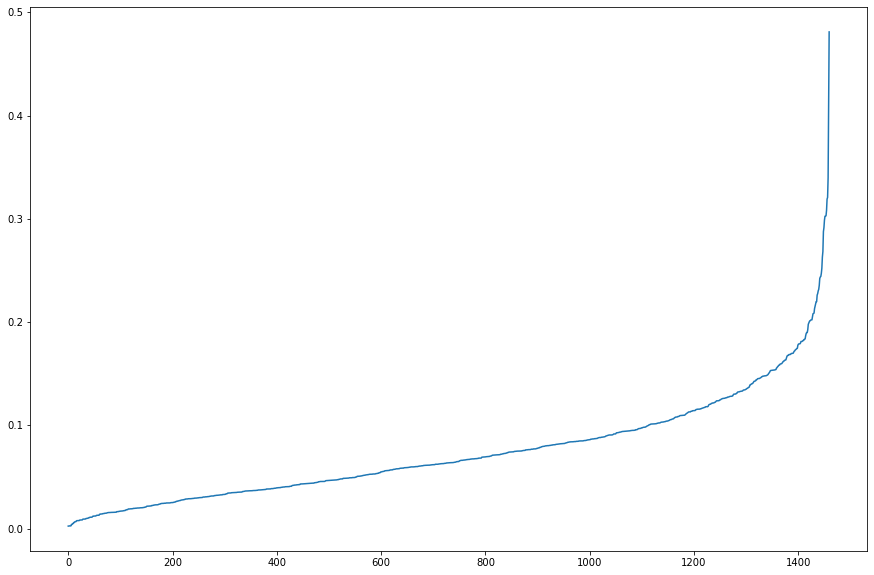

In [38]:
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.plot(distances);

In [39]:
#based on the graph, epsilon will be around 0.2
dbscan(0.2, 22)

Silhouette score: 0.33
ARI score: -0.00


In [40]:
for i in range (2, 22):
    print('\nNumber of components: {}'.format(i))
    gmm_test(i)


Number of components: 2
Silhouette score: 0.35
ARI score: 0.00

Number of components: 3
Silhouette score: 0.38
ARI score: 0.00

Number of components: 4
Silhouette score: 0.42
ARI score: 0.00

Number of components: 5
Silhouette score: 0.33
ARI score: 0.00

Number of components: 6
Silhouette score: 0.37
ARI score: 0.00

Number of components: 7
Silhouette score: 0.43
ARI score: 0.00

Number of components: 8
Silhouette score: 0.49
ARI score: 0.00

Number of components: 9
Silhouette score: 0.48
ARI score: 0.00

Number of components: 10
Silhouette score: 0.42
ARI score: 0.00

Number of components: 11
Silhouette score: 0.44
ARI score: 0.00

Number of components: 12
Silhouette score: 0.45
ARI score: 0.00

Number of components: 13
Silhouette score: 0.44
ARI score: 0.00

Number of components: 14
Silhouette score: 0.46
ARI score: 0.00

Number of components: 15
Silhouette score: 0.44
ARI score: 0.00

Number of components: 16
Silhouette score: 0.44
ARI score: 0.00

Number of components: 17
Silhoue

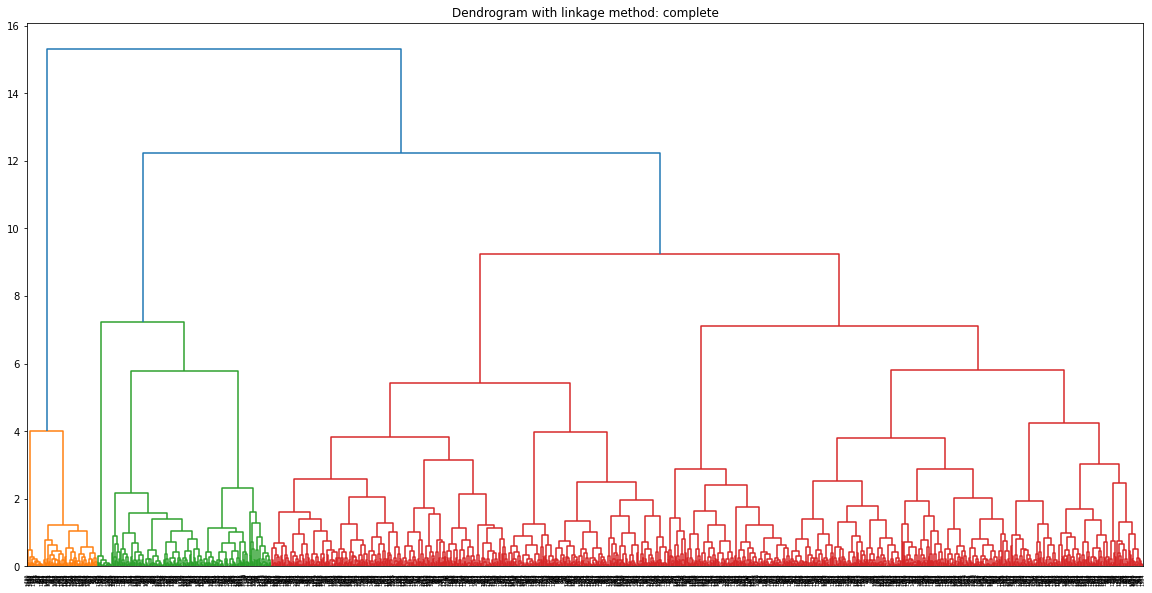

In [41]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X, method='complete'))
plt.show()

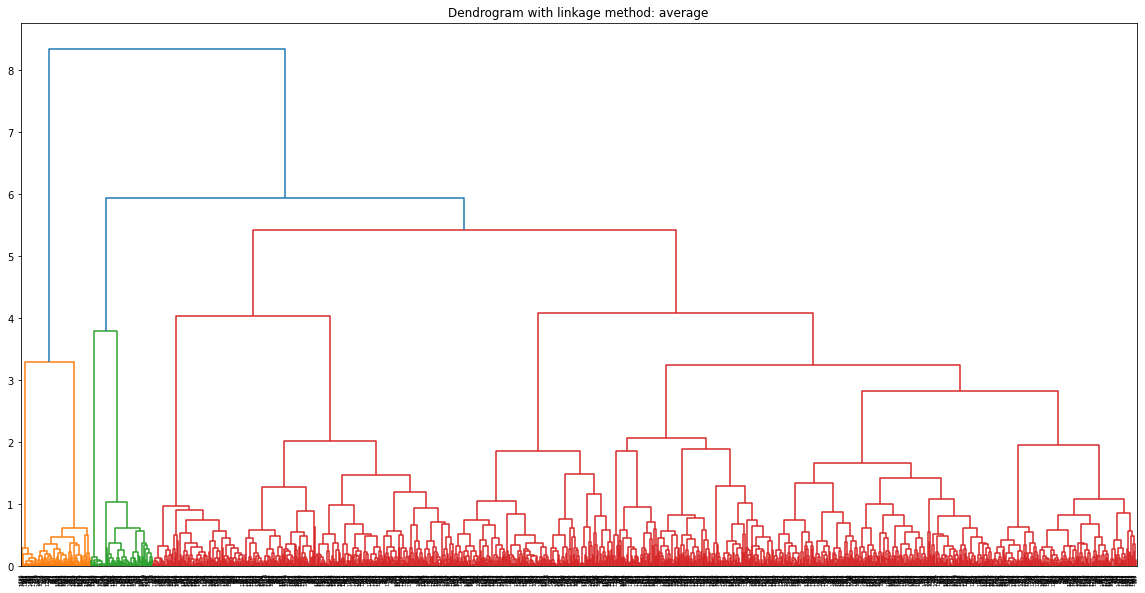

In [42]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X, method='average'))
plt.show()

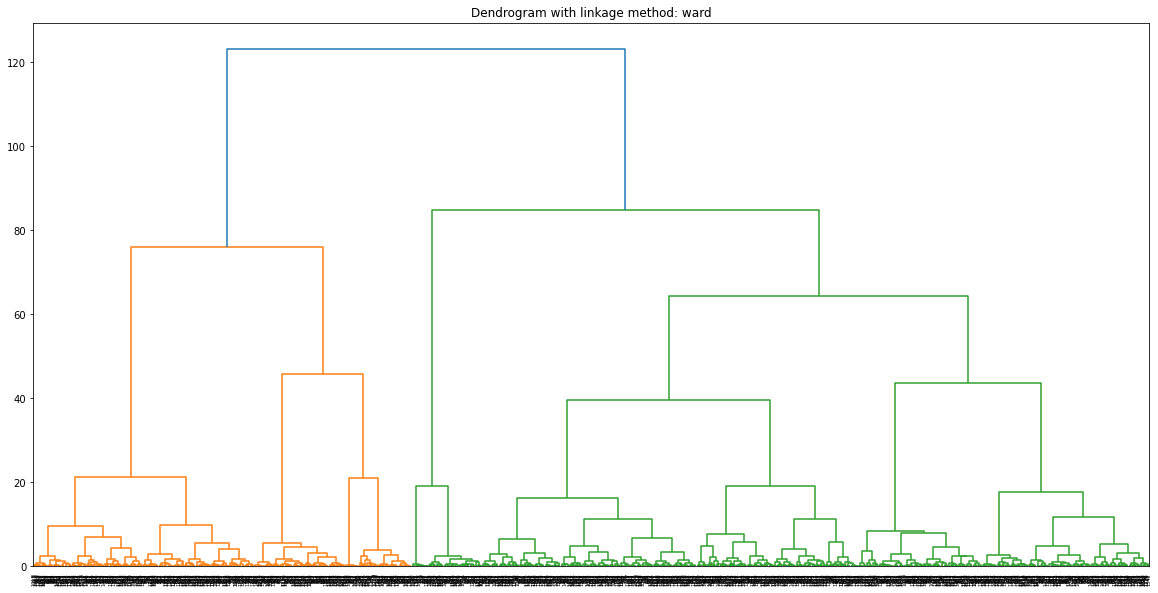

In [43]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X, method='ward'))
plt.show()

In [44]:
#ward works best with 2 clusters explaining the most
agg_test('ward', 'euclidean', 5)

Silhouette score: 0.48
ARI score: -0.00


No test after UMAP was over 70%.

Based on the results, I would either use GMM or Agglomerative after PCA. However, given the results were mostly bad all around, I would assume the data (and especially the target) isn't the most suited for unsupervised learning.